In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import contour

In [2]:
def to_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [9]:
input_image = cv.imread("../../../class.vision/images/matn.png", 0)
binary_img = cv.threshold(input_image, 127, 255, cv.THRESH_BINARY_INV)[1]

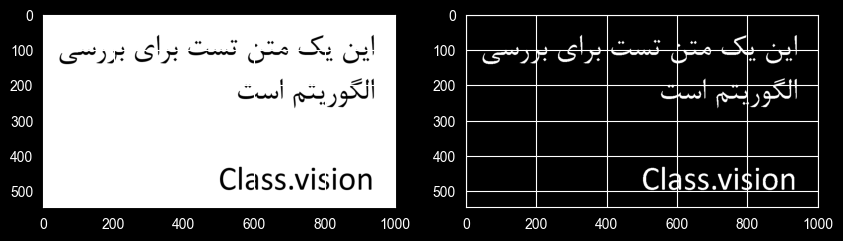

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(input_image, cmap='gray')
plt.subplot(122); plt.imshow(binary_img, cmap='gray')

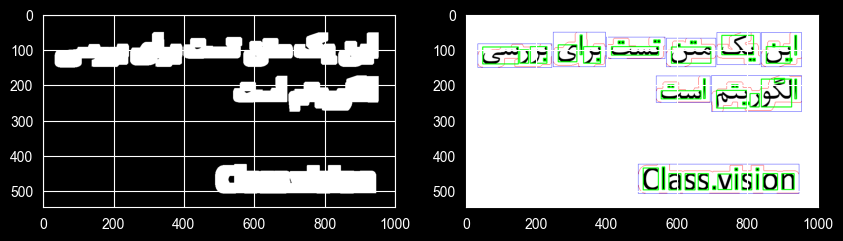

In [49]:
bolded_img = cv.dilate(binary_img, cv.getStructuringElement(cv.MORPH_RECT, (15,10)), iterations=2)
contours, _ = cv.findContours(bolded_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
draw_img = cv.cvtColor(input_image, cv.COLOR_GRAY2BGR)

cv.drawContours(draw_img, contours, -1, (0,0,255), 1)

for cnt in contours:
    bbox = cv.boundingRect(cnt)
    cv.rectangle(draw_img, bbox, (255,0,0), 1)
    ROI = binary_img[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
    inner_contours, _ = cv.findContours(ROI, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for inner_cnt in inner_contours:
        inner_bbox = list(cv.boundingRect(inner_cnt))
        inner_bbox[0] += bbox[0]
        inner_bbox[1] += bbox[1]
        cv.rectangle(draw_img, inner_bbox,(0,255,0), 2)


plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(bolded_img, cmap='gray')
plt.subplot(122); plt.imshow(draw_img[...,::-1])